# Energy Study on 15 Selected Countries
**Python Class Project**  
*by Archana Narasimhan and Zihan Zeng*

## Key Objectives

The objective of this project is to gather, clean and analyze data related to Energy Indicators, GDP (Gross Domestic Product), and journal contributions in the field of Energy Engineering and Power Technology.

The primary tasks include reading and processing data from various sources, then performing data transformations and calculations to remove unnecessary columns, rename countries, convert units, and handle missing values, ensuring a comprehensive dataset is created suitable for further analysis.

This dataset is used to answer the questions related to GDP, energy supply, renewable energy, population estimates and correlations between variables. From this we gain insights into the economic and energy landscape of different countries, identify the trends (GDP, scientific journals), compare statistics and understand the correlation. Thus the policymakers, researchers and analysts makes informed decisions related to energy policies, economic development and research priorities.

## Dataset

The dataset used in this study is a selected portion from three sources: United Nation energy supply and renewable electricity production for year 2013 (http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls), World Bank country GDP from year 1960 to 2015 (http://data.worldbank.org/indicator/NY.GDP.MKTP.CD), and Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology (http://www.scimagojr.com/countryrank.php?category=2102) from year 1996 to 2015.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:
### Read energy supply data
energy = pd.read_excel(
    'EnergyIndicators.xls',
    sheet_name='Energy',
    names=['Country','Energy Supply','Energy Supply per Capita','% Renewable'],
    usecols=[2,3,4,5],
    skiprows=17,
    skipfooter=38,
    na_values='...'
)

### Convert pegajoules to gigajoules
energy['Energy Supply'] *= 1000000

### Clean country names
energy['Country'] = energy['Country'].str.extract(r'([A-Za-z\s\'\,\-]+)')
energy['Country'] = energy['Country'].str.strip()
energy_ctyRename = {'Republic of Korea':'South Korea',
                    'United States of America': 'United States',
                    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                    'China, Hong Kong Special Administrative Region': 'Hong Kong'}
energy['Country'].replace(energy_ctyRename, inplace=True)

### Read GDP data
GDP = pd.read_csv('world_bank.csv',skiprows=4)

### Clean country names
GDP_ctyRename = {'Korea, Rep.':'South Korea',
                 'Iran, Islamic Rep.':'Iran',
                 'Hong Kong SAR, China':'Hong Kong'}
GDP['Country Name'].replace(GDP_ctyRename, inplace=True)

### Read citation data
ScimEn = pd.read_excel('scimagojr-3.xlsx')

### Merge tables
ScimEn_m = ScimEn['Rank'].isin(range(1,16))
GDP_m = [0,]+list(range(-10,0))

df = pd.merge(ScimEn[ScimEn_m], energy, on='Country', validate='one_to_one')
df = df.merge(GDP.iloc[:,GDP_m], left_on='Country', right_on='Country Name', validate='one_to_one')

df.drop(columns='Country Name', inplace=True)
df.set_index('Country', inplace=True)

print("Shape:", df.shape)
df

Shape: (15, 20)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


## Data Understanding

### Q2  
*What are the top 15 countries for average GDP over the last 10 years?*

In [3]:
avgGDP = lambda: df.iloc[:,range(10,20)].mean(axis=1).sort_values(ascending=False)
avgGDP()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

GDP gives the measure of economic growth of the countries. Here we measure Average_GDP to understand the average economic performance of different countries over 10 years period. Sorting the Average_GDP values provides insight into which countries experienced the highest economic growth or stability during this timeframe of 10 years.

However, average GDP over years is not a good metric in real life. GDP is commonly evalutated based on each separate year and by annual growth rate.

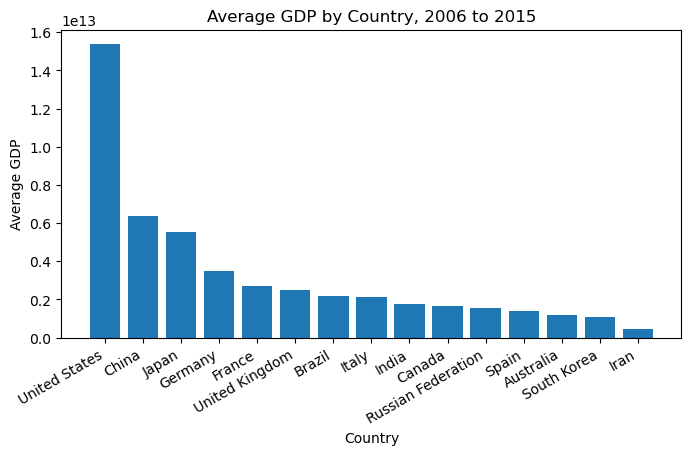

In [4]:
def plt_avgGDP():
    plt.figure(figsize=(8,4))
    plt.bar(avgGDP().index, avgGDP())
    plt.xticks(rotation=30, ha='right')
    plt.title("Average GDP by Country, 2006 to 2015")
    plt.xlabel("Country")
    plt.ylabel("Average GDP")
    plt.show()
plt_avgGDP()

### Q3  
*By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?*

In [5]:
def GDP_change(n):
    if 0<n<16:
        i = avgGDP().index[n-1]
        return df['2015'].loc[i]-df['2006'].loc[i]
GDP_change(6)

246702696075.3999

We measure GDP change to get the insight of the economic performance and growth of the countries over a specific period of time. Here we can see the change in GDP over the 10 year period for the sixth largest country by the previous ranking (United Kingdom) is 246.7 billion dollars.

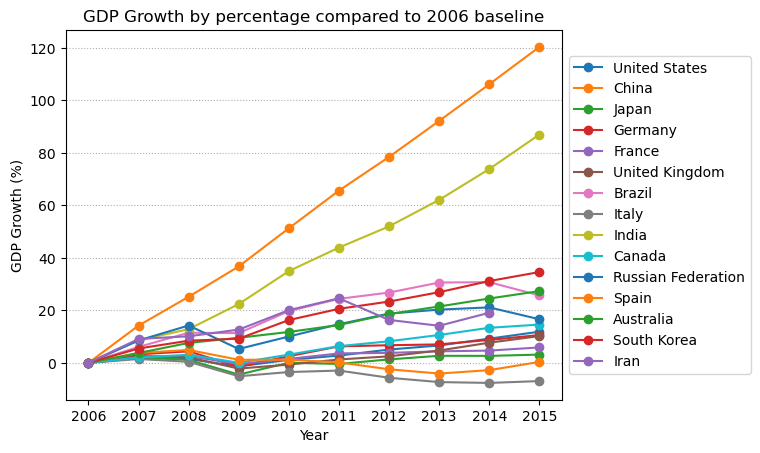

In [6]:
# GDP growth over 10 years for each country compared to 2006 baseline
GDP_growth = df.iloc[:,range(10,20)].reindex(avgGDP().index).T
def plt_GDPgrowth():
    for i in range(15):
        GDP_growth['growth'] = (GDP_growth.iloc[:,i] / GDP_growth.iloc[0,i] -1) *100
        GDP_growth.iloc[:,i] = GDP_growth.pop('growth')
        plt.plot(GDP_growth.index, GDP_growth.iloc[:,i], label=GDP_growth.columns[i], marker='o')
    plt.grid(True, axis='y', linestyle='dotted')
    plt.legend(loc=6,bbox_to_anchor=(1, 0.5))
    plt.title("GDP Growth by percentage compared to 2006 baseline")
    plt.xlabel("Year")
    plt.ylabel("GDP Growth (%)")
    plt.show()
plt_GDPgrowth()

### Q4  
*What is the mean energy supply per capita?*

In [7]:
# Arithmetic mean
mean_energy_pc = lambda: df['Energy Supply per Capita'].mean()

# Weighted average
df['Population Estimate'] = df['Energy Supply'] / df['Energy Supply per Capita']
wavg_energy_pc = lambda: df['Energy Supply'].sum() / df['Population Estimate'].sum()

print("Arithmetic mean energy supply per capita:", mean_energy_pc(), "GJ")
print("Weighted average energy supply per capita:", wavg_energy_pc().round(1), "GJ")

Arithmetic mean energy supply per capita: 157.6 GJ
Weighted average energy supply per capita: 99.6 GJ


Calculation of the mean energy supply per capita provides insight into the average amount of energy supplied per person across different countries.

There are two ways to calculate mean, arithmetic mean and weighted average. Weighted average is the correct method to be used in this case for calculation of energy supply per capita of all 15 countries, using the total energy supply divide by the total population, which gives 99.6 GJ.

In [8]:
# Average renewable energy
avg_renew_pc = lambda: (df['Energy Supply']*df['% Renewable']/100).sum() / df['Population Estimate'].sum()
avg_renew = lambda: avg_renew_pc() / wavg_energy_pc() *100

print("Average renewable energy per capita:", avg_renew_pc().round(1), "GJ")
print("Average % renewable:", avg_renew().round(2), "%")

Average renewable energy per capita: 18.6 GJ
Average % renewable: 18.68 %


### Q5  
*Which country has the maximum % Renewable and what is the percentage?*

In [9]:
def max_bycol(col):
    i = df[col].idxmax()
    v = df[col].max()
    return i,v
max_bycol('% Renewable')

('Brazil', 69.64803)

Percentage renewable provides the proportion of energy generation that comes from renewable sources in a country. Renewable energy is energy produced from resources that are environment friendly, such as solar, wind, hydro, nuclear, etc.  
We can see from this data that Brazil is the leading country with 69.65% of its energy supply coming from renewable energy.

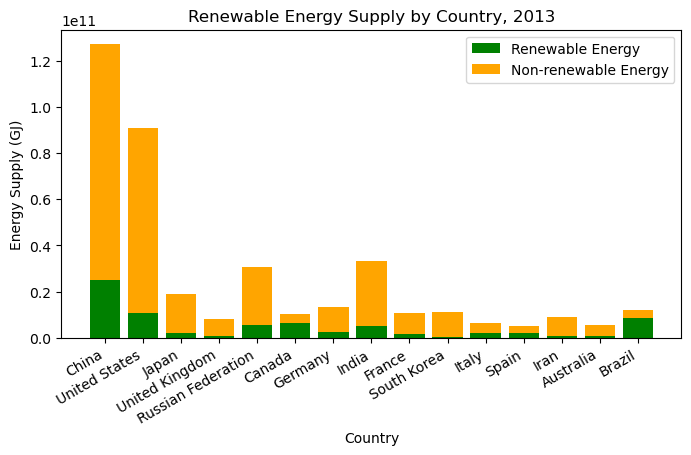

In [10]:
def plt_renew():
    renew_energy = df['Energy Supply']*df['% Renewable']/100
    noren_energy = df['Energy Supply']-renew_energy
    plt.figure(figsize=(8,4))
    plt.bar(df['% Renewable'].index, renew_energy, color='green', label='Renewable Energy')
    plt.bar(df['% Renewable'].index, noren_energy, color='orange', bottom=renew_energy, label='Non-renewable Energy')
    plt.xticks(rotation=30, ha='right')
    plt.title("Renewable Energy Supply by Country, 2013")
    plt.xlabel("Country")
    plt.ylabel("Energy Supply (GJ)")
    plt.legend()
    plt.show()
plt_renew()

### Q6  
*Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and which country has the highest ratio?*

In [11]:
df['Citation Ratio'] = df['Self-citations'] / df['Citations']
max_bycol('Citation Ratio')

('China', 0.6893126179389422)

Self-citation is a common practice in scientific writings where the authors cite their own previous work for their current work. A high self-citation ratio can be seen as a demostration of authors' expertise in the area, and ensures the integrity and accuracy of the research. Here we can see that China is leading with a citation ratio of 0.689.

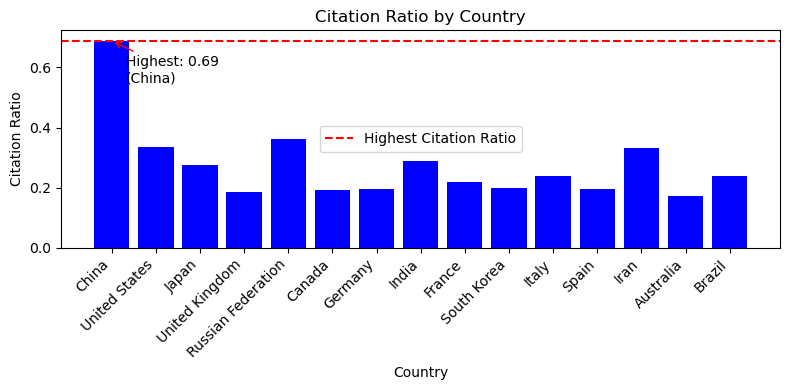

In [25]:
def plt_citation_ratio():
    country_highest_citation_ratio, highest_citation_ratio = max_bycol('Citation Ratio')
    
    plt.figure(figsize=(8, 4))
    plt.bar(df.index, df['Citation Ratio'], color='blue')
    plt.xlabel('Country')
    plt.ylabel('Citation Ratio')
    plt.title('Citation Ratio by Country')
    plt.xticks(rotation=45, ha='right')
    plt.axhline(highest_citation_ratio, color='red', linestyle='dashed', label='Highest Citation Ratio')
    plt.annotate(f'Highest: {highest_citation_ratio:.2f}\n({country_highest_citation_ratio})',
                 xy=(country_highest_citation_ratio, highest_citation_ratio),
                 xytext=(10, -30),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='red'))
    plt.legend()
    plt.tight_layout()
    plt.show()
plt_citation_ratio()

### Q7  
*Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate?*

In [12]:
df['Population Estimate'] = df['Energy Supply'] / df['Energy Supply per Capita']
Country_by_population = lambda n: df['Population Estimate'].sort_values(ascending=False).index[n-1]
Country_by_population(3)

'United States'

Population of each country in year 2013 is estimated using energy supply and energy supply per capita data. Sorting the estimated population helps in identifying the countries with the highest estimated populations. Here we find the third populous country is the United States.

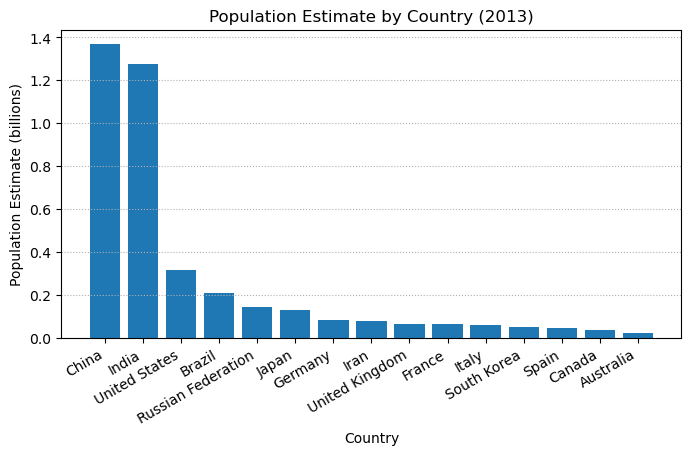

In [13]:
def plt_population():
    x = [Country_by_population(i) for i in range(1,16)]
    y = df['Population Estimate'].reindex(x) / 1000000000
    plt.figure(figsize=(8,4))
    plt.bar(x,y)
    plt.xlabel("Country")
    plt.ylabel("Population Estimate (billions)", rotation=90)
    plt.xticks(rotation=30, ha='right')
    plt.title("Population Estimate by Country (2013)")
    plt.grid(True, axis='y', linestyle='dotted')
    plt.show()
plt_population()

### Q8  
*Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the “.corr()” method, (Pearson's correlation).*

In [14]:
df['Citable docs per Capita'] = df['Citable documents'] / df['Population Estimate']
corr_citable_energy = lambda: df['Citable docs per Capita'].corr(df['Energy Supply per Capita'])
corr_citable_energy()

0.7940010435442942

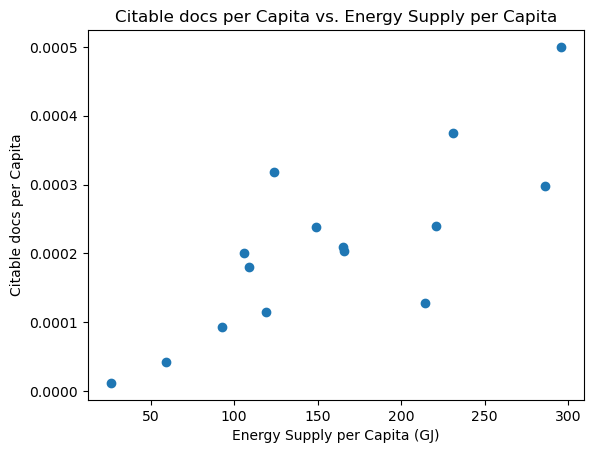

In [15]:
def plt_energyCit():
    x = df['Energy Supply per Capita']
    y = df['Citable docs per Capita']
    plt.scatter(x,y)
    plt.title(y.name+' vs. '+x.name)
    plt.xlabel(x.name+' (GJ)')
    plt.ylabel(y.name)
    plt.show()
plt_energyCit()

The correlation factor, varies from -1 (negative correlation) to +1 (positive correlation), is calculated with Pearson's method. From this value, we know that there is a positive linear correlation which indicates that countries with higher energy availability tend to produce more research output showing a positive relationship between energy resources, reseach and innovation activities within the country.

Energy supply per capita is highly positive correlated with citable docs per capita, with a corrlation factor of 0.794.

In [16]:
corr_energyGDP = df['Energy Supply'].corr(df['2013'])
corr_energyGDP

0.7618784629811916

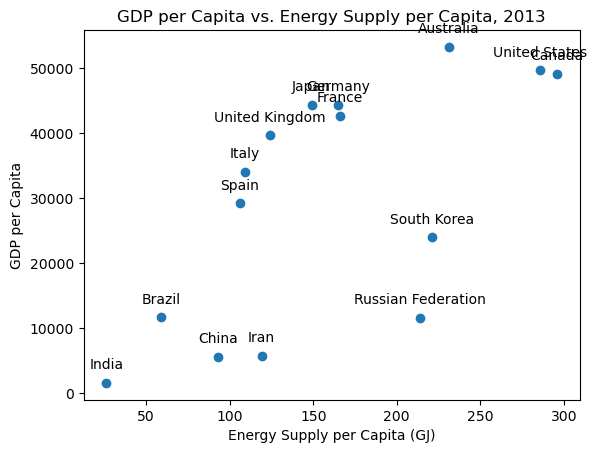

In [17]:
def plt_energyGDP():
    x = df['Energy Supply per Capita']
    y = df['2013'] / df['Population Estimate']
    plt.scatter(x,y)
    for i, label in enumerate(x.index):
        plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title("GDP per Capita vs. Energy Supply per Capita, 2013")
    plt.xlabel(x.name+' (GJ)')
    plt.ylabel("GDP per Capita")
    plt.show()
plt_energyGDP()

We can conclude from data of year 2013 that there is a high positive correlation (0.76) between country's GDP per capita and energy supply per capita. It is reasonable to suggest that a country seeking increase in GDP would consider boosting its energy supply.

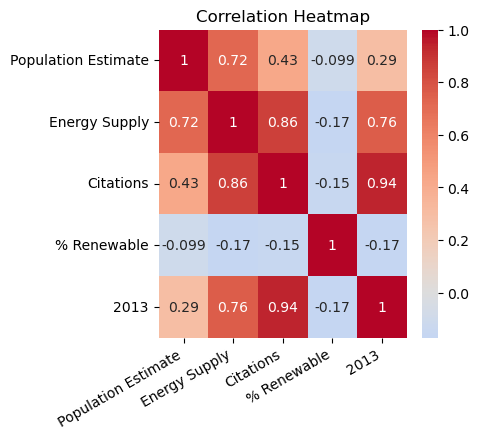

In [18]:
def plt_corr():
    variables = ['Population Estimate', 'Energy Supply', 'Citations', '% Renewable', '2013']
    correlation_matrix = df[variables].corr()
    plt.figure(figsize=(4, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.xticks(rotation=30, ha='right')
    plt.show()
plt_corr()

### Q9  
*Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.*

In [19]:
def HighRenew():
    med = df['% Renewable'].median()
    df['HighRenew'] = df['% Renewable'].map(lambda y: 0 if y<med else 1).astype('uint8')
    return df['HighRenew']
HighRenew()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: uint8

By comparing each country's percentage renewable value to its median we can categorize countries as having high or low renewable energy production. This might be useful for further analysis of comparing countries with higher and lower renewable energy utilization among the top15 countries.  
Here we have categorized 8 countries as High (1) in renewable energy percentage and 7 countries as Low (0) in renewable energy percentage.

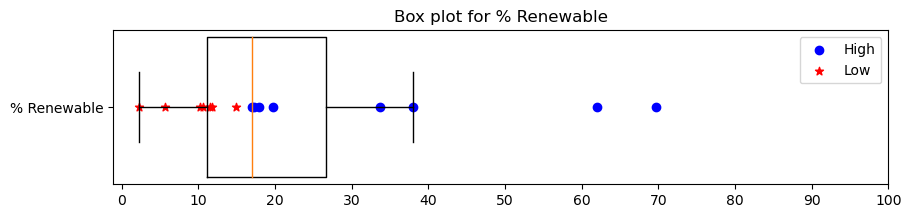

In [20]:
def plt_renewbox():
    plt.figure(figsize=(10,2))
    plt.boxplot(df['% Renewable'], vert=False, labels=['% Renewable',], widths = 2, showfliers=False)
    plt.scatter(df['% Renewable'][df['HighRenew']==1],[1]*8, marker='o', color='blue', label='High')
    plt.scatter(df['% Renewable'][df['HighRenew']==0],[1]*7, marker='*', color='red', label='Low')
    plt.xticks(range(0,110,10))
    plt.title("Box plot for % Renewable")
    plt.legend()
    plt.show()
plt_renewbox()

### Q10  
*Use the following dictionary to group the Countries by Continent, then create a dataframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each continent.*

In [21]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
def byContinent():
    df_c = df['Population Estimate'].groupby(ContinentDict).agg(['size','sum','mean','std'])
    df_c.index.names = ['Continent']
    return df_c
byContinent()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


Descriptive statistics helps to compare and understand the distribution, measure of central tendency, and measure of variability of the estimated population across different continents.  
Here we can see among the 15 countries, 6 are in Europe, 5 in Asia, 2 in North America, 1 in South America, and 1 in Australia continent. Asia has the highest population followed by Europe, and countries in Asia also has the highest mean population while countries in Australia has the least population.

### Q11  
*Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?*

In [22]:
def Renew_Continent():
    x = pd.cut(df['% Renewable'],
               bins=np.linspace(0,100,6),
               labels=['0-20','20-40','40-60','60-80','80-100']
              )
    y = x.groupby([ContinentDict,x]).count()
    y.index.names = ['Continent','% Renewable']
    return y[y>0]
Renew_Continent()

Continent      % Renewable
Asia           0-20           5
Australia      0-20           1
Europe         0-20           4
               20-40          2
North America  0-20           1
               60-80          1
South America  60-80          1
Name: % Renewable, dtype: int64

Five bins are created for % Renewable, 0-20, 20-40, 40-60, 60-80, and 80-100. We can see most of the 15 countries falls into 0-20 bin, 5 in Asia and 4 in Europe. North Americ and South America each has one country that falls in 60-80 bin.

### Q12
*Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.*

In [23]:
def PopEst():
    df['PopEst'] = df['Population Estimate'].map("{:,}".format)
    s = df.pop('PopEst')
    return s
PopEst()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

There are a lot of people in these countries.